<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you are expected to leverage a wide variety of tools, but this report should focus on presenting findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not a code review. Optionally, you can submit your code as a python notebook or as a print out in the appendix of your document.

* The grading will center around 5 main points:

* Does the report include a section describing the data?

* Does the report include a paragraph detailing the main objective(s) of this analysis?  

* Does the report include a section with variations of classifier models and specifies which one is the model that best suits the main objective(s) of this analysis?

* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?

* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?

## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
df = pd.read_csv("bank-additional.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation and the benefits that your analysis provides to the business or stakeholders of this data.

* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

* Brief summary of data exploration and actions taken for data cleaning and feature engineering.

* Summary of training at least three different classifier models, preferably of different nature in explainability and predictability. For example, you can start with a simple logistic regression as a baseline, adding other models or ensemble models. Preferably, all your models use the same training and test splits, or the same cross-validation method.

* A paragraph explaining which of your classifier models you recommend as a final model that best fits your needs in terms of accuracy and explainability.

* Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your classifier model.

* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model after adding specific data features that may help you achieve a better explanation or a better prediction.

# 1. About the Data


The dataset chosen for this analysis contains Black Friday sales predictions. It includes numerical features like product categories, purchase values and categorical features like occupation, marital status, gender and age. The target variable is "Purchase".

In [4]:
df.shape

(4119, 21)

In [5]:
# statistical info
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

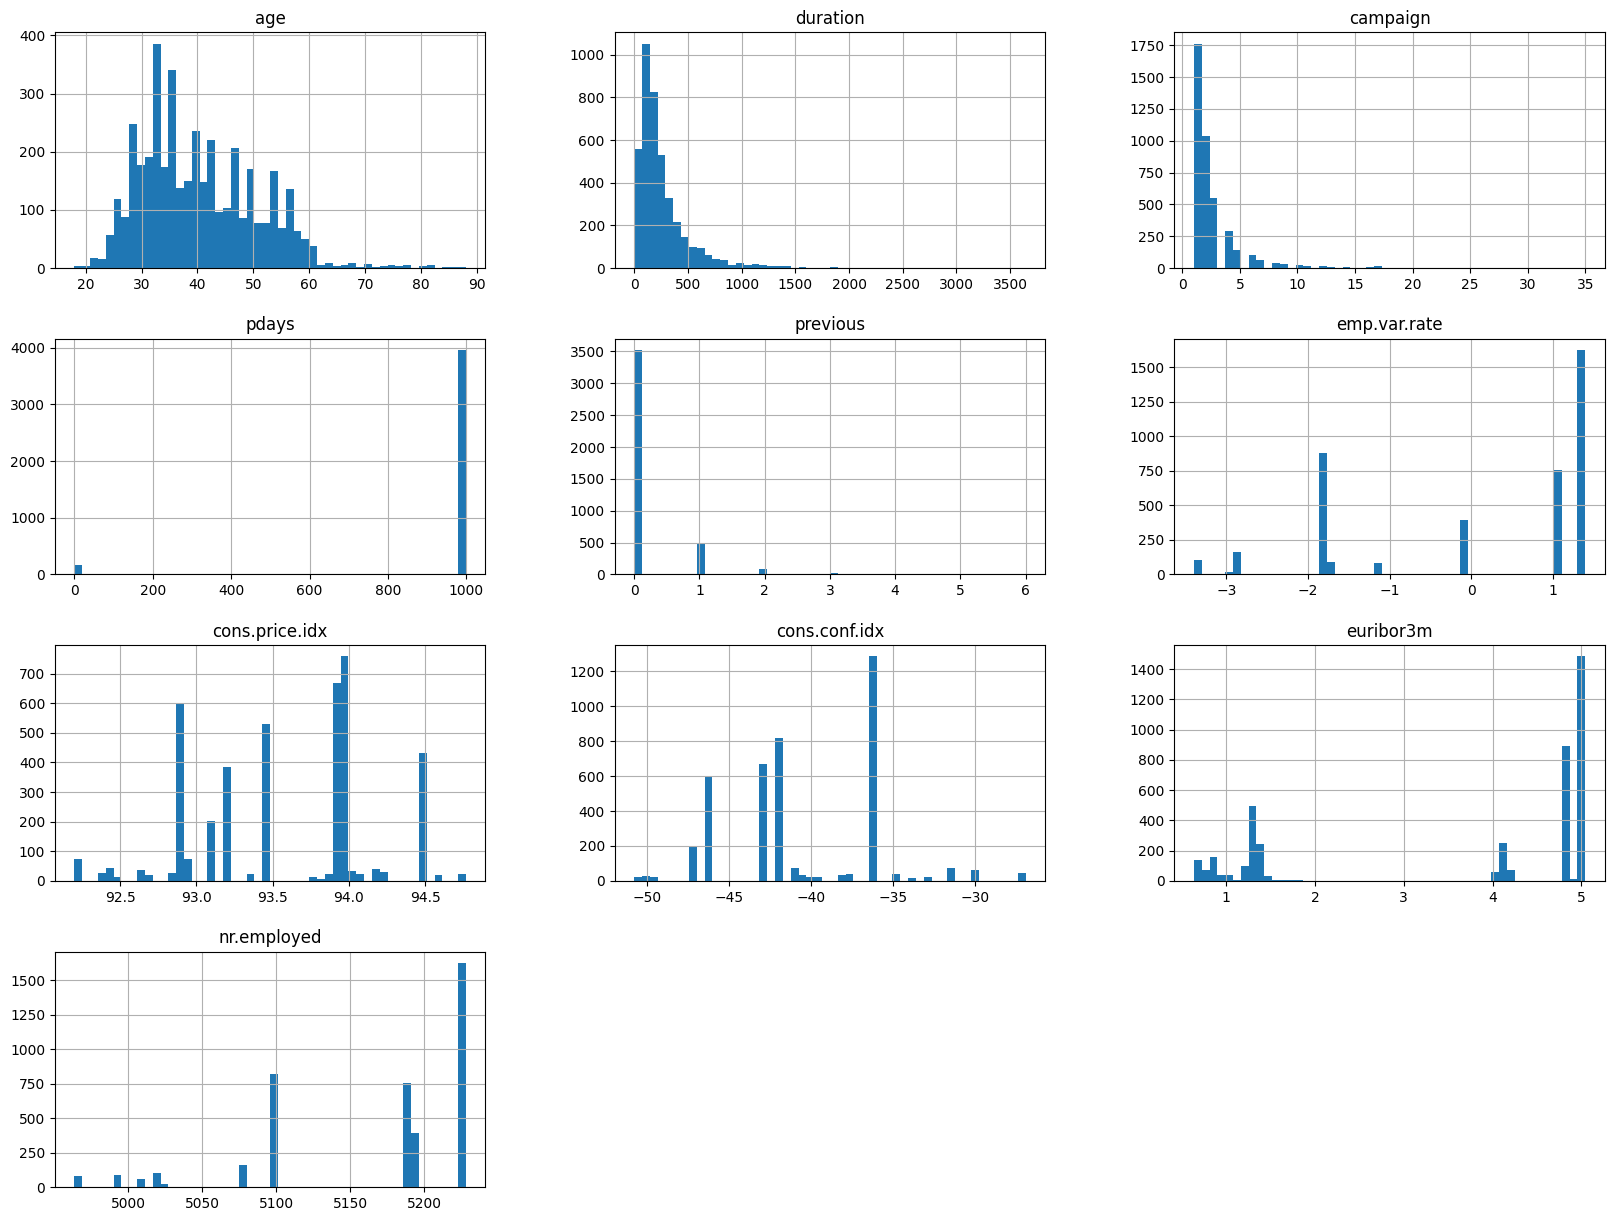

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# find unique values
df.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

In [9]:
# Exploratory Data Analysis and Preprocessing

During data exploration and preprocessing steps, I examined the distribution of some important features, checked for missing and duplicate values, and looked for potential outliers. Data cleaning involved handling missing values, removing outliers if necessary, removing excesive skewness, scaling the numerical features and encoding categorical variables if applicable. Feature engineering in the later step of training included creating a new feature.

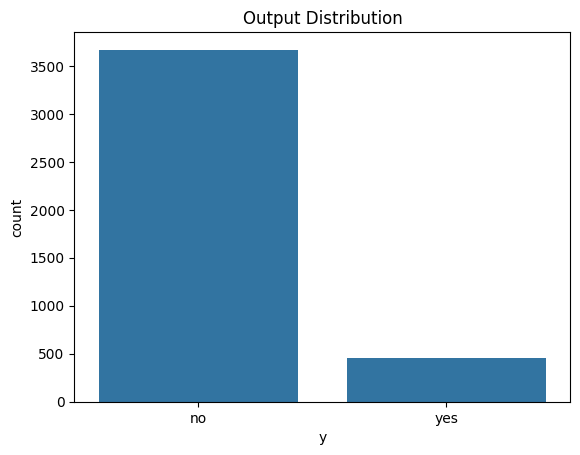

In [10]:
# displaying the distribution of target variable "y"
sns.countplot(x = df["y"])
plt.title("Output Distribution")
plt.show()

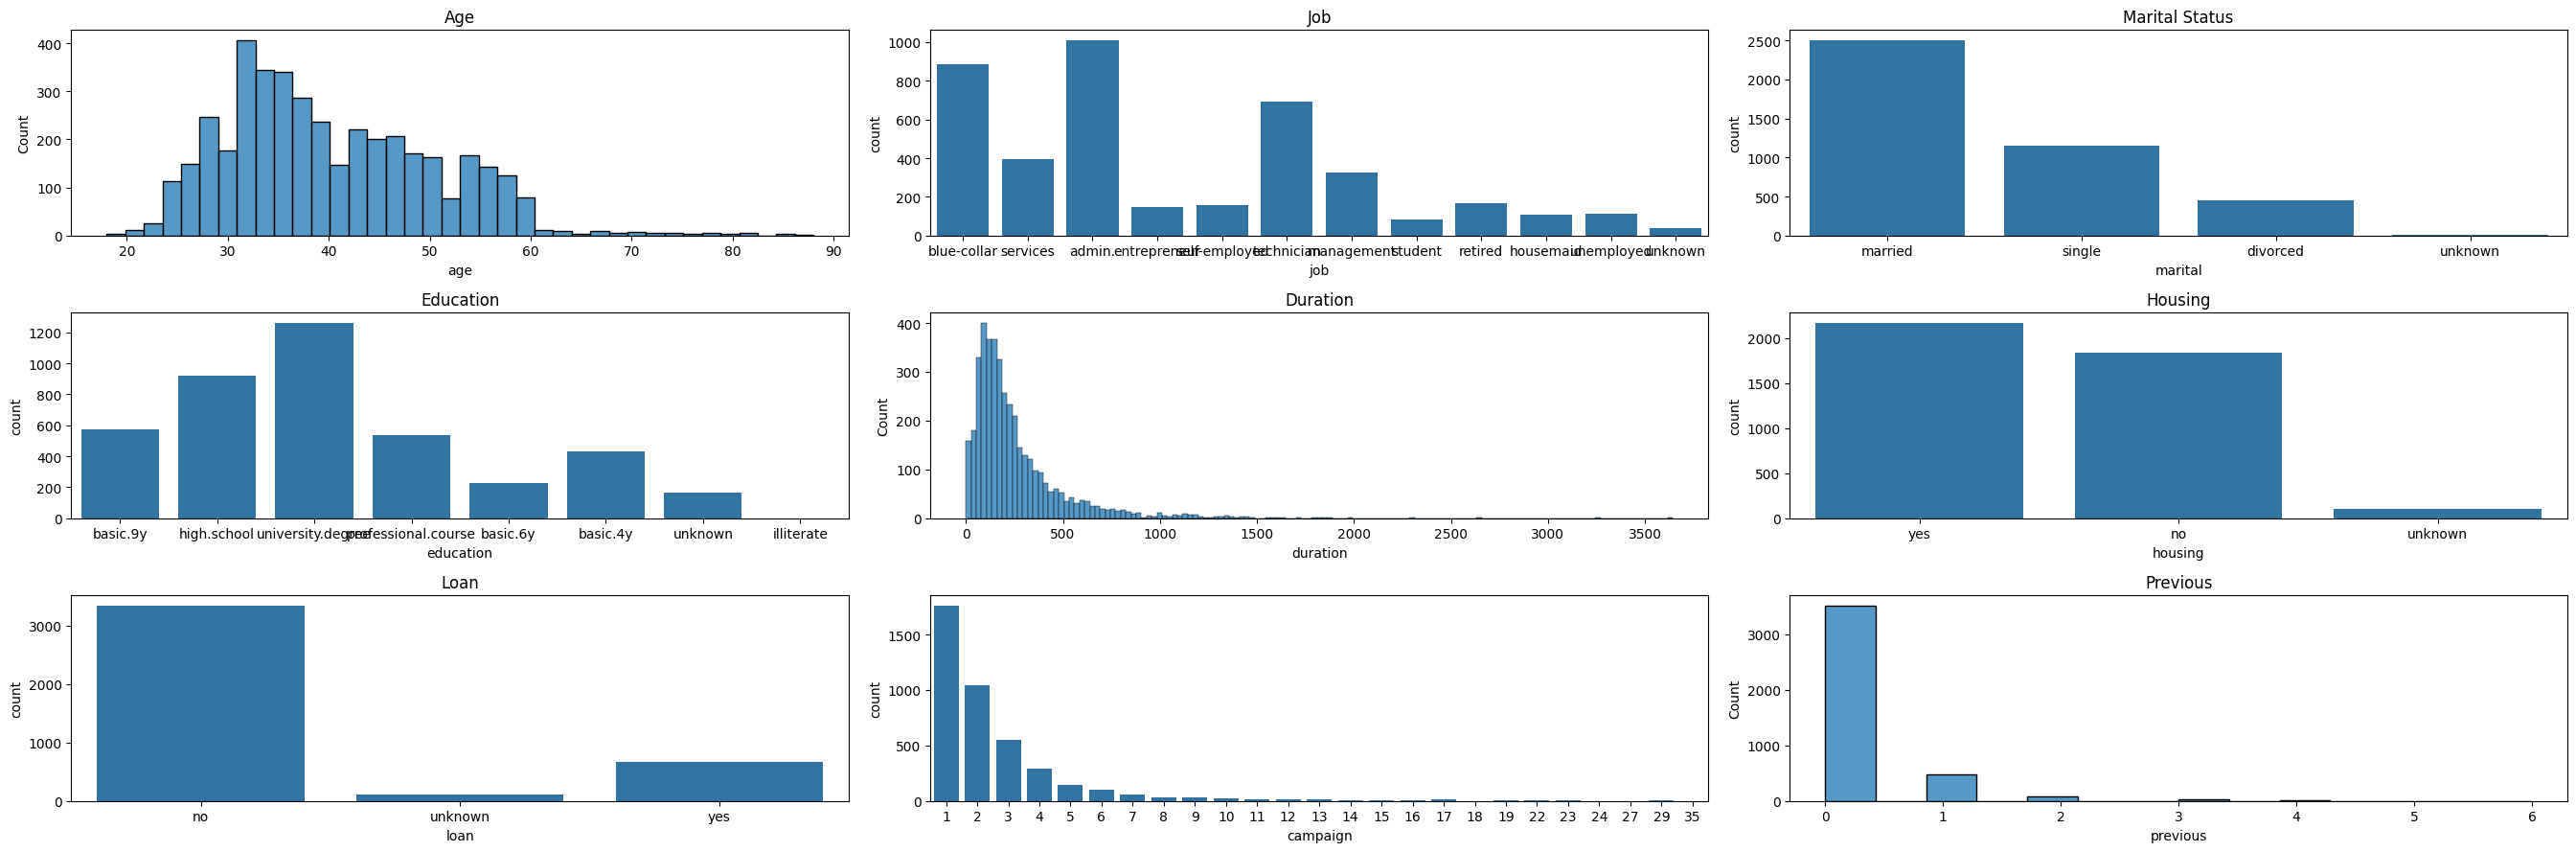

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(27, 9))
axes = axes.flatten()

# Plot countplots for each feature in its corresponding subplot
sns.histplot(x=df['age'], ax=axes[0])
axes[0].set_title('Age')

sns.countplot(x=df['job'], ax=axes[1])
axes[1].set_title('Job')

sns.countplot(x=df['marital'], ax=axes[2])
axes[2].set_title('Marital Status')

sns.countplot(x=df['education'], ax=axes[3])
axes[3].set_title('Education')

sns.histplot(x=df['duration'], ax=axes[4])
axes[4].set_title('Duration')

sns.countplot(x=df['housing'], ax=axes[5])
axes[5].set_title('Housing')

sns.countplot(x=df['loan'], ax=axes[6])
axes[6].set_title('Loan')

sns.countplot(x=df['campaign'], ax=axes[7])
axes[8].set_title('Campaign')

sns.histplot(x=df['previous'], ax=axes[8])
axes[8].set_title('Previous')

plt.tight_layout()
plt.show()

In [12]:
# check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().any()

False

In [14]:
# Handling outliers on the numeric columns, by using the Interquartile Method
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    df.loc[df[column] > upper_limit, column] = upper_limit

In [15]:
# encoding values using one hot encoding to improve the metric
# label encoding
cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [16]:
# as can be seen in the explarotary data analysis section, some columns are skewed either to the left or to the right
# hence, applying logarithmic data transformation to reduce the skewness in some columns

# age, campaign and previous are applied log transformation
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)
# apply the transformation
columns = ['age', 'duration', 'campaign', 'previous']
to_right_skewed = logarithm_transformer.transform(df[columns])
df['age'] = to_right_skewed[:, 0]
df['duration'] = to_right_skewed[:, 1]
df['campaign'] = to_right_skewed[:, 2]
df['previous'] = to_right_skewed[:, 3]

# nr_employed is applied x² transformation
columns = ['nr.employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True) # FunctionTransformer(np.exp, validate=True) #
to_left_skewed = exp_transformer.transform(df[columns])
df['nr.employed'] = to_left_skewed[:, 0]

In [17]:
# Feature scaling/normalization on the numeric columns with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.015820,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0
1,0.015442,7,2,3,0,0,0,1,6,0,...,1.238303,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,-0.954520,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.704287,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0
4,0.766684,0,1,6,0,2,0,0,7,1,...,-0.954520,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0


In [18]:
# Adding a new feature

df['totalLoan'] = df['loan'] + df['housing']
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0,2
1,0.015442,7,2,3,0,0,0,1,6,0,...,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0,2
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0,2
4,0.766684,0,1,6,0,2,0,0,7,1,...,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0,2


# 2. Objectives


The main objective of this analysis is to develop classification models to predict the target variable accurately while maintaining interpretability. The focus is primarily on prediction, but it's essential to understand the relationships between the predictors and the target variable for interpretability purposes.

In [19]:
X = df.drop(["y"], axis = 1)
y = df["y"]

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,totalLoan
0,-1.034821,1,1,2,0,2,0,0,6,0,...,0.201031,0.0,1,-1.206054,-1.185448,-1.241242,-1.331707,-0.922997,0,2
1,0.015442,7,2,3,0,0,0,1,6,0,...,0.201031,0.0,1,0.649441,0.715193,0.892682,0.711698,0.329039,0,0
2,-1.759565,7,1,3,0,2,0,1,4,4,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.773427,0.840822,0,2
3,-0.088878,7,1,2,0,1,1,1,4,0,...,0.201031,0.0,1,0.841389,1.528273,-0.283154,0.771697,0.840822,0,2
4,0.766684,0,1,6,0,2,0,0,7,1,...,0.201031,0.0,1,-0.118350,-0.655478,-0.326703,0.328632,0.395048,0,2


In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [22]:
# Oversampling the "yes" samples

from imblearn.over_sampling import SMOTE

# Since there are very less "yes" samples, the model is tended to predict the result as "no".
# This results in a very low recall rate. SMOTE is used to increase the number of "yes" samples thus to increase recall rate.
smt = SMOTE(random_state = 42)
X_train, y_train = smt.fit_resample(X_train, y_train)

# 3. Classification Models


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8911508581752484
Test score: 0.9037220843672455
Model Score: 0.8398058252427184

RMSE: 0.40024264485094735


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

### Ridge Classifier

In [30]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8821767698378737
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


In [31]:
model = make_pipeline(StandardScaler(), RidgeClassifier())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8821767698378737
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


In [32]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
alpha = np.geomspace(100, 0.01, 5)

param_grid = dict(solver=solvers,alpha=alpha)

grid = GridSearchCV(RidgeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'alpha': 0.1, 'solver': 'auto'}


In [33]:
model = make_pipeline(StandardScaler(), RidgeClassifier(alpha = 0.1))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.8823717016117529
Test score: 0.9061577641373907
Model Score: 0.8211974110032363

RMSE: 0.42285055160986107


### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9053951409689536
Test score: 0.8859279091027819
Model Score: 0.8551779935275081

RMSE: 0.38055486657312887


In [35]:
criterion = ["gini", "entropy"]
max_leaf_nodes = range(100,400, 50)
min_samples_split = range(2, 11)
param_grid = dict(criterion= criterion, max_leaf_nodes= max_leaf_nodes, min_samples_split= min_samples_split)

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

print(f"Best params:{grid.best_params_}")

Best params:{'criterion': 'gini', 'max_leaf_nodes': 200, 'min_samples_split': 4}


In [36]:
model = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 200, min_samples_split = 4 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Training score: 0.9083210193505444
Test score: 0.8818727961342564
Model Score: 0.8673139158576052

RMSE: 0.36426101101050445


### XGBoost Classifier

In [37]:
# !pip install xgboost

In [38]:
from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9393475015451909
Test score: 0.8956412433067781
Model Score: 0.8940129449838188

RMSE: 0.3255565312141368


In [40]:
param_grid = {"max_depth":range(5,10) }

grid = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'max_depth': 8}


In [41]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth = 8)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9412960585746208
Test score: 0.8956379783204911
Model Score: 0.8932038834951457

RMSE: 0.32679675106226863


### LightGBM Classifier

In [42]:
# !pip install lightgbm

In [43]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(verbose=-1)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9336916274425903
Test score: 0.8964542248922556
Model Score: 0.8956310679611651

RMSE: 0.3230618083878609


In [44]:
param_grid = {"num_leaves":range(100,500,100) }

grid = GridSearchCV(LGBMClassifier(verbose=-1), param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'num_leaves': 200}


In [45]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(num_leaves = 200, verbose=-1)

model.fit(X_train, y_train)
y_p = model.predict(X_test)

print("Training score:", np.mean(cross_val_score(model, X_train, y_train)))
print("Test score:", np.mean(cross_val_score(model, X_test, y_test)))
print( f"Model Score: {model.score(X_test, y_test)}")
print("")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_p)))

Training score: 0.9453911472448058
Test score: 0.9005028078882068
Model Score: 0.901294498381877

RMSE: 0.3141743172478027


Summary of the Classification Models:

Five classification models were trained and evaluated:

* Logistic Regression Model: Achieved moderate training and test scores with a moderate root mean squared error (RMSE). It demonstrates moderate performance in capturing linear relationships between features and the target variable.

* Ridge Classifier Model: Performed decently with a slightly higher test score compared to logistic regression. It provides a regularization technique to mitigate multicollinearity and overfitting, resulting in robust model performance.

* Decision Tree Classifier Model: Demonstrated strong training and test scores, indicating its ability to capture complex relationships in the data. However, it has a slightly higher RMSE compared to other models, suggesting some variability in predictions.

* XGBoost Classifier Model: Exhibited high training and test scores with a relatively low RMSE, indicating its robustness and effectiveness in handling complex datasets. It utilizes an ensemble of decision trees to improve predictive accuracy.

* LightGBM Classifier Model: Outperformed other models with the highest test score and lowest RMSE. It leverages gradient boosting and histogram-based algorithms to efficiently handle large datasets and capture intricate patterns in the data.

Recommendation for the Final Model:
Based on the results, the LightGBM Classifier model appears to be the most suitable final model. It achieved the lowest root mean squared error (RMSE) and a relatively higher test score compared to the other models. Thus, the LightGBM Classifier model captures complex patterns in the data more successfully, enhancing its predictive performance.

# 4. Insights and key findings


Among the evaluated classification models, LightGBM emerged as the top performer, exhibiting the highest test score and lowest RMSE. Decision tree classifiers also showed promise in capturing complex relationships, while ridge regularization enhanced stability in logistic regression. Overall, LightGBM's superior performance and efficiency make it the recommended choice for deployment.

# 5. Next Steps


Further analysis could involve fine-tuning specific hyperparameters for the LightGBM model in a more detaild and sophisticated manner to potentially improve its performance. Additionally, exploring ensemble methods by combining the strengths of multiple models could enhance predictive accuracy and robustness.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
